In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'UP'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

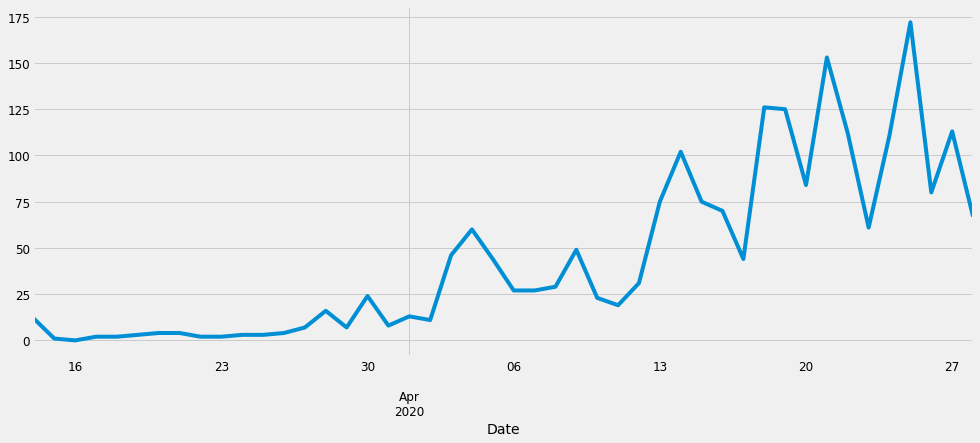

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

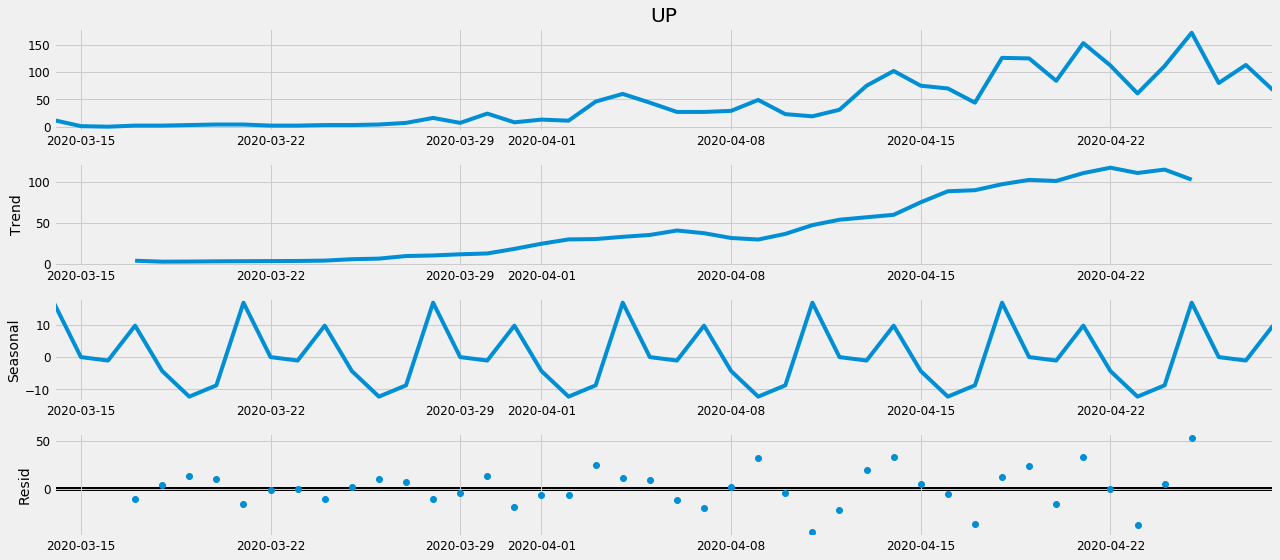

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:504.8607288284604


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1507.0710413040472
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:354.89376859335465
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:231.9434052752583
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:356.7221150247966
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:349.18952645718406
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:239.9787804558368


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:231.95484352902125
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:461.94331167020914
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2854.786066952163
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:332.0702337324913
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:218.12904376242616
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:349.98687153764456
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:333.4188401010366
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:237.3721848696824
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:219.74400929643198
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:430.201667040722


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1459.0612208794637
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:327.447226896505
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:213.76230670953095
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:334.55574514561295


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1229.327980938092
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:222.8053672064113
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:215.76036944547687
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:410.5353738358644
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1318.2822443599969
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:312.60641925445697
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:200.31171697871068
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:326.7727634885782
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1312.3369023935002
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:220.0120737549492
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:202.31167708555427
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:438.83221410584383


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1387.2084807115868
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:333.586560481215
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:223.43185126084867
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:334.41141446308814
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:336.4060969041052
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:222.68402063563087
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:224.49192616721086
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:420.6477733169293


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1671.3601416960362
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:323.2905350729204
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:211.62892965492074
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:328.48309523518174
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:321.6639377112723
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:221.75134339873054
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:214.21293558544815
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:426.5916147065964


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1036.305677744092
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:326.3687851749676
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:213.63144112497875
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:323.35492582762146


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1343.9738889629698
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:213.52049183763842
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:215.2079971299626
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:412.51539206021135


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:990.8568337254401
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:313.47057831795473
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:202.08159700471768
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:319.70012386282616
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1282.1560548889272
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:212.30771987765564
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:204.7683008986484


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1815      0.401      0.453      0.651      -0.604       0.967
ma.L1         -1.1813      0.331     -3.568      0.000      -1.830      -0.532
ma.S.L12      -0.6687      0.966     -0.693      0.489      -2.561       1.224
sigma2      1028.2523   1058.855      0.971      0.331   -1047.065    3103.570


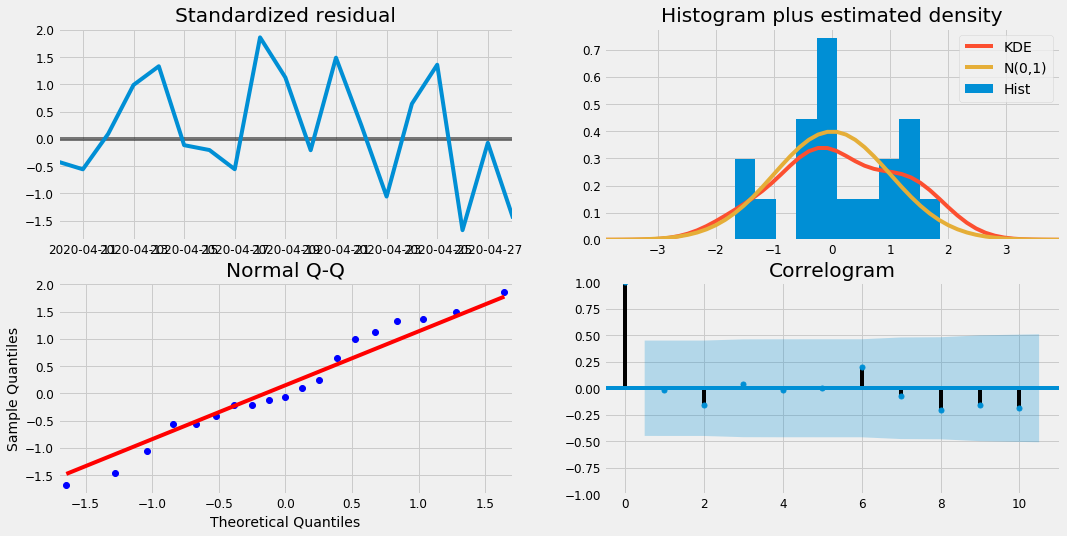

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

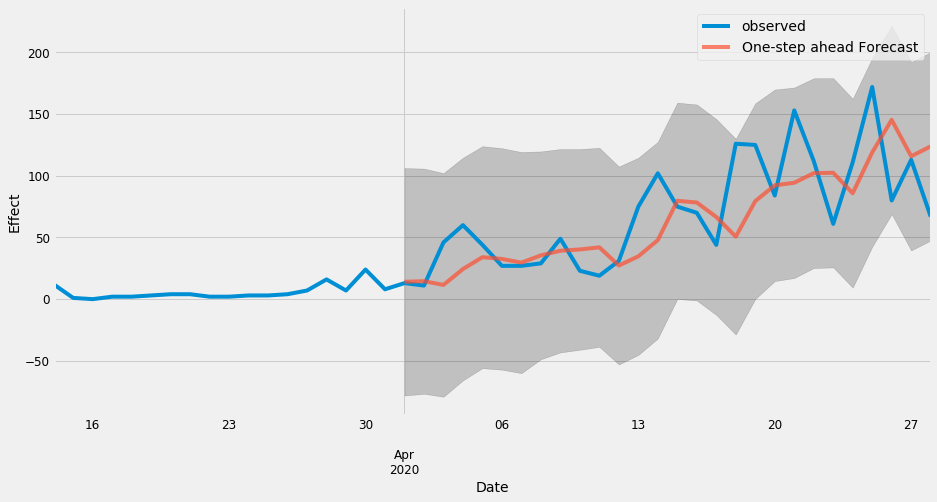

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [43]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 1170.44


In [44]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 34.21


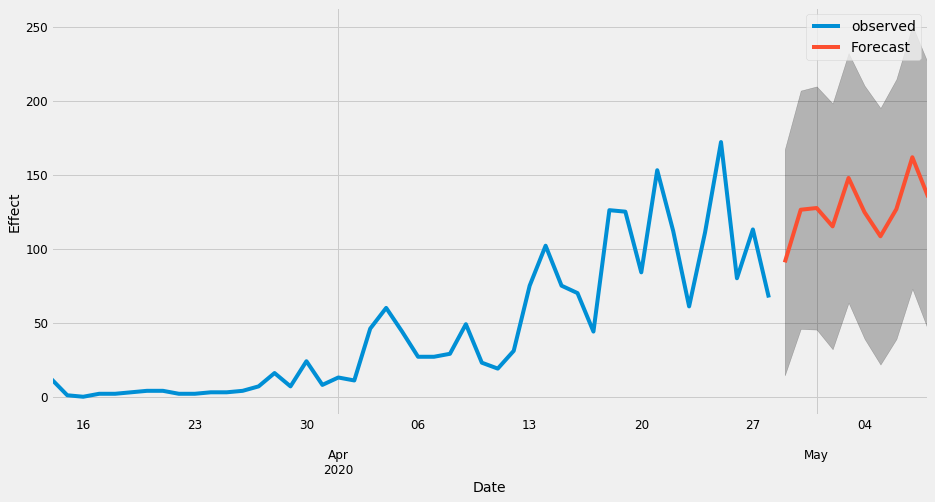

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,111,20
2020-04-25,172,35
2020-04-26,80,66
2020-04-27,113,72
2020-04-28,67,63


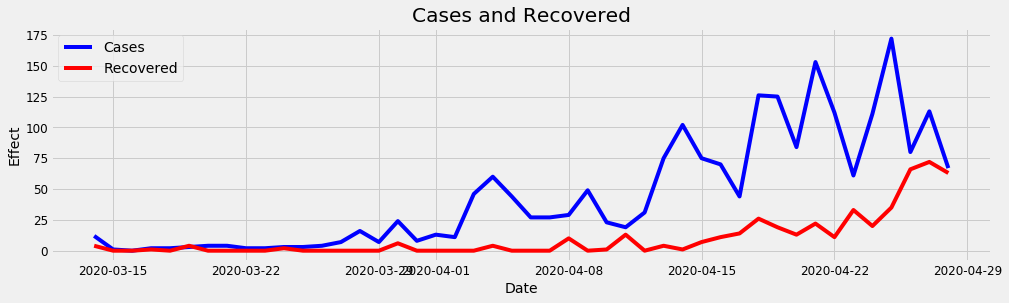

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

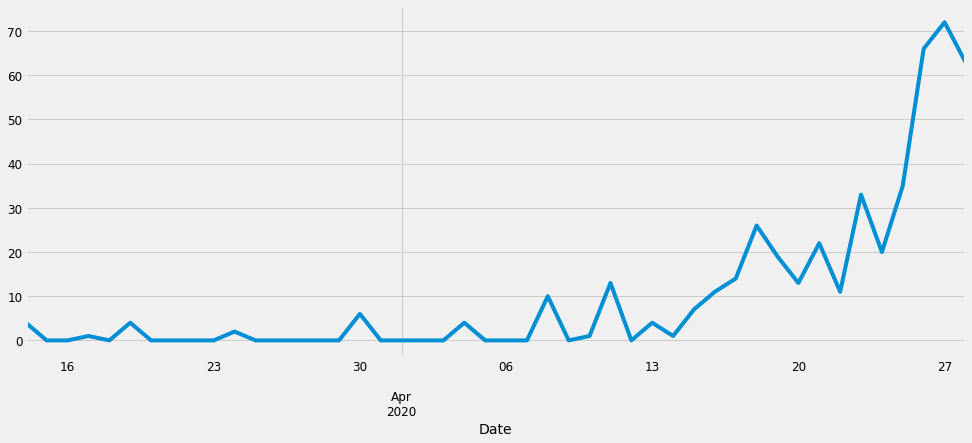

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

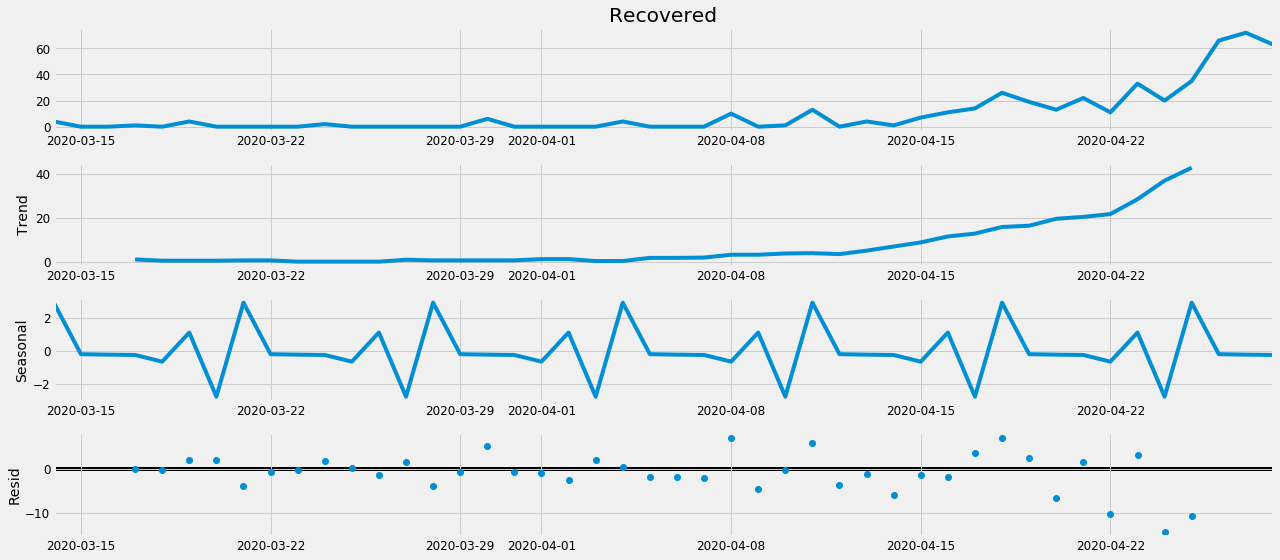

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:401.18135601385444
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1755.3323599492333
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:297.76011844620416


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:200.49706894078759
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:296.04509458642656
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1537.4544789093798


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:202.6268266685018
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:196.0453534637536
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:360.13751490574447


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1650.5100536488712
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:266.8381798280664
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:178.4093131052845
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:283.23445922958837


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1702.5519968744811
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:194.03389072904716
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:180.40931130013522
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:314.55108384655284
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1348.3184365703326


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:239.34682282351793
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:158.90375830429335
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:245.62444480401723

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1188.0858313430842
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:166.49400612580465
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:160.5279544289202
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:308.4924542854853
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2907.2204468227583
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:233.81212992907047
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:153.32071335462308
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:246.63629262819563
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3227.271428751803
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:168.110517409434
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:154.92487555442588
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:322.71623081031953


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1432.4148210935498
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:247.87506662586068
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:168.5641976232578
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:247.5870818589563


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1384.263245758565
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:168.49067303715228
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:170.1503530704151
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:298.80040693098124


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1306.7968452645887
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:233.71525612338272
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:156.56966825819293
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:237.07066383306534


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1262.427696661502
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:165.15901460146188
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:159.09526344308102
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:314.4978106192304


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1344.867344035222
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:240.38574634774136
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:160.67684228066005
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:240.3067075936052


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1415.0872812612565
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:160.4022036270325
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:162.2729681395873
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:310.3991598436532
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1374.7356471209882
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:235.7546250852012
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:155.21453188884956
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:242.26319655982212
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2962.069331467722
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:162.3492218126504
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:156.88335091813136


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5223      2.381      0.219      0.826      -4.144       5.188
ma.L1         -0.6143      2.244     -0.274      0.784      -5.013       3.784
ma.S.L12      -0.3035      0.615     -0.493      0.622      -1.509       0.902
sigma2       134.9465     52.872      2.552      0.011      31.318     238.575


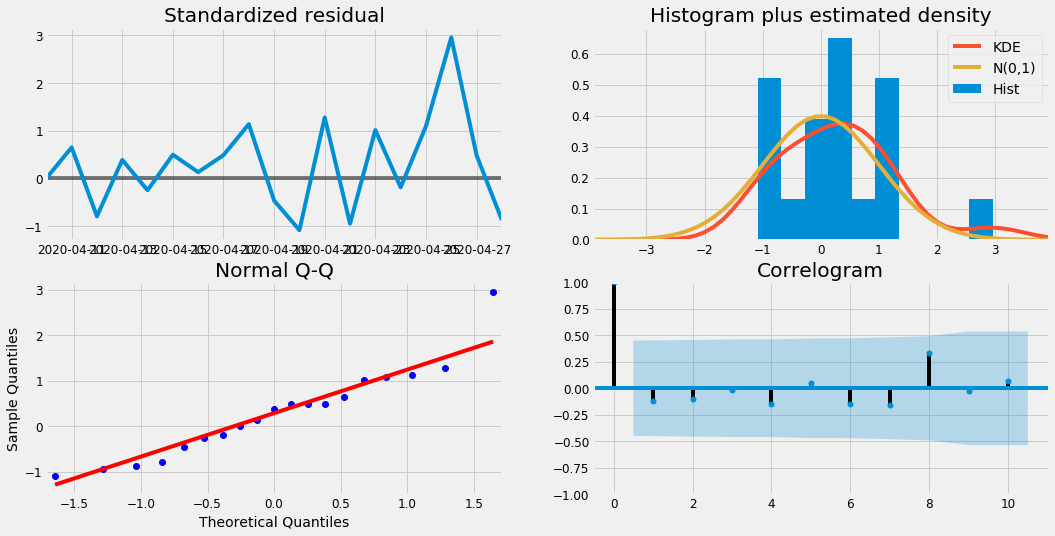

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

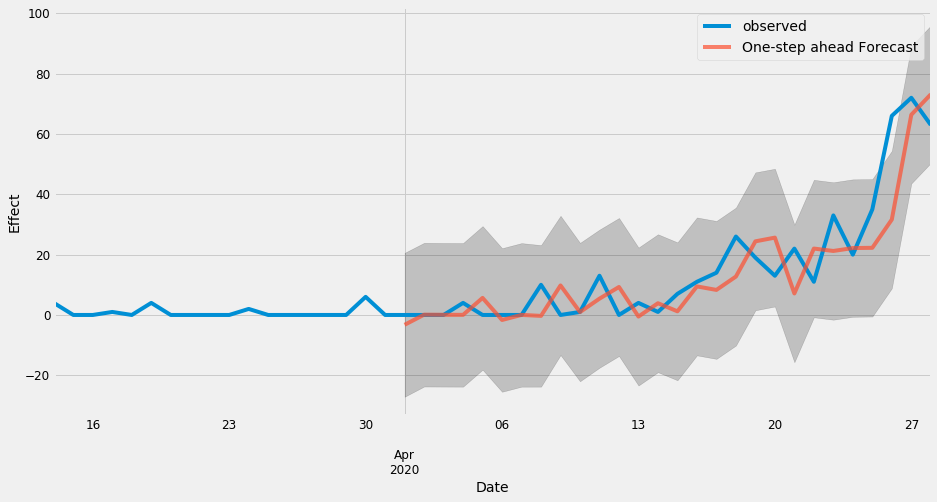

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 101.2


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 10.06


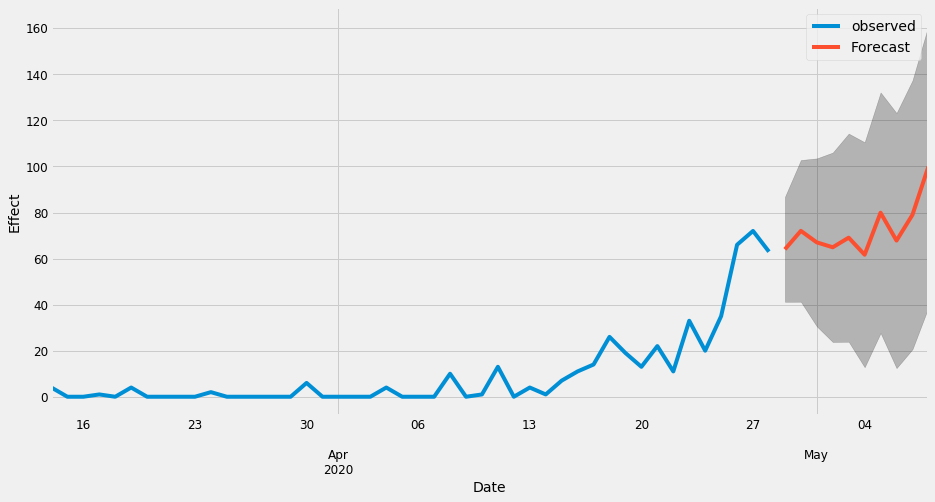

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

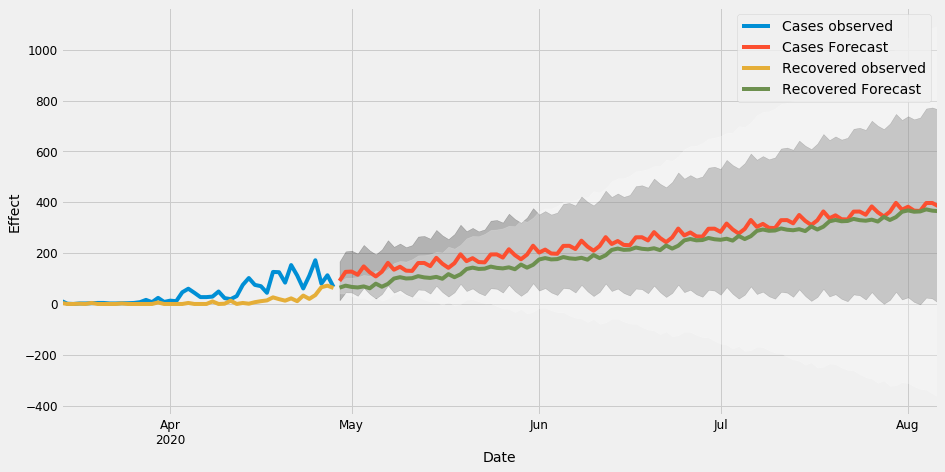

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

252

In [33]:
int(min(cases_result_date[0]))

90

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-26


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-14


In [38]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

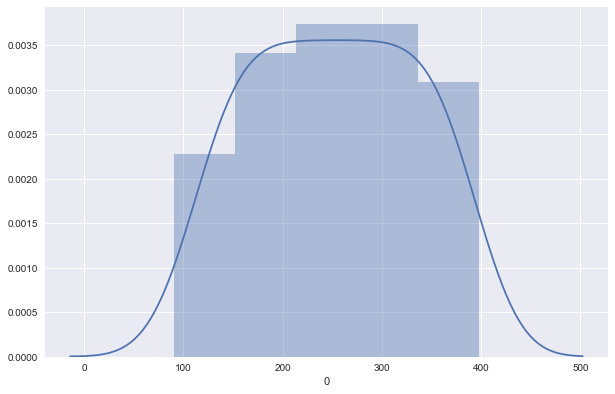

In [39]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

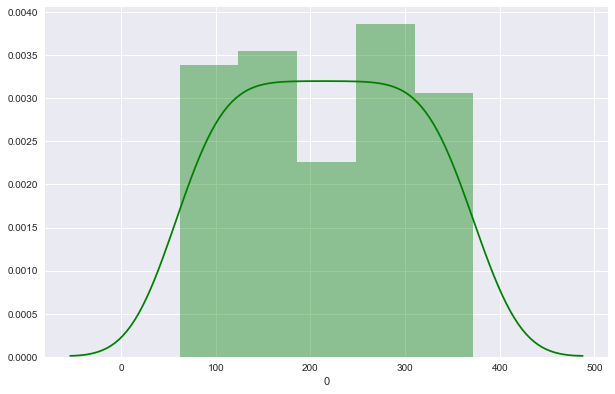

In [40]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

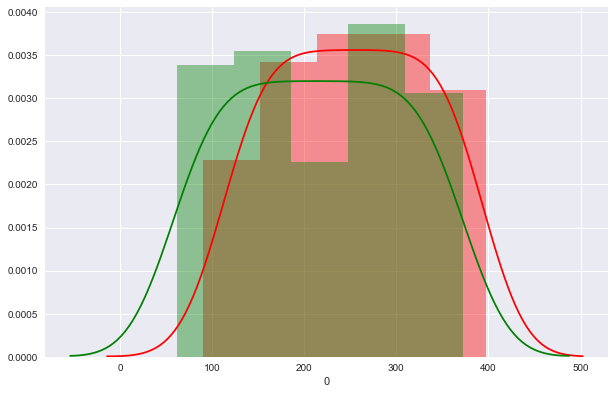

In [41]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

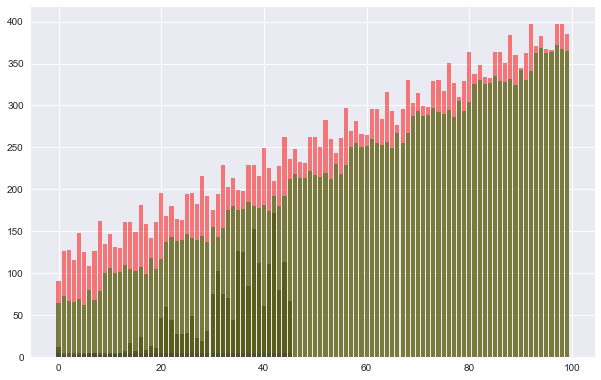

In [42]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()